## **E9 241 Digital Image Processing Project 2023**
# <u>Project Title </u>
## **Exploring the Impact of Image Pre-Processing on Human Face Detection**

### **By**
* **Oindrila Haldar**
* **Saptarshi Mandal**





# <u>**Project Pipeline**</u>

**Denoising Methods:**

1.   Wiener Filtering
2.   Principal Component Analysis (PCA)
3.   Non-Local Means (NLM)

**Contrast Enhancement**

1.  Brightness Preserving Bi Histogram Equalization (BBHE)
2.  Recursive Mean-Separate Histogram Equalization (RMSHE)

**Downsampling and Upsampling**

# **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy
import skimage
from sklearn import decomposition
from google.colab.patches import cv2_imshow
import math
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
import os
import skimage.util
import scipy

# **Testing on Sample Images**

## Loading Sample Image

In [ ]:
#sample_image_1 = np.array(cv2.cvtColor(skimage.io.imread('/content/image_1.jpg'), cv2.COLOR_BGR2GRAY))
#sample_image_1 = sample_image_1.astype('uint8')

In [ ]:
# sample_image_1 =  np.array(cv2.cvtColor(skimage.io.imread('/content/image_2.jpg'), cv2.COLOR_BGR2GRAY))
# sample_image_2 = sample_image_2.astype('uint8')

In [ ]:
# sample_image_1 = np.array(cv2.cvtColor(skimage.io.imread('/content/image_3.jpg'), cv2.COLOR_BGR2GRAY))

In [ ]:
# sample_image_1 = np.array(cv2.cvtColor(skimage.io.imread('/content/image_4.jpg'), cv2.COLOR_BGR2GRAY))

In [ ]:
# sample_image_1 = np.array(cv2.cvtColor(skimage.io.imread('/content/image_9.png'), cv2.COLOR_BGR2GRAY))

## Face Detector Function

In [2]:
def face_detector(I):

  face_detector=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  J = [[(I[i,j],I[i,j],I[i,j]) for j in range(len(I[0]))]for i in range(len(I))]
  J = np.array(J,dtype='uint8')

  faces = face_detector.detectMultiScale(I, 1.3, 5)
  for (x,y,w,h) in faces:
      cv2.rectangle(J,(x,y),(x+w,y+h),(255,0,255),2)


  windows = []

  for (x,y,w,h) in faces:
    #windows.append({'x1':x,'y1':y,'x2':x+w,'y2':y+h})
    windows.append([x,y,x+w,y+h])


  return J, windows

## Adding Noise

### White Noise

In [ ]:
def add_white_noise(Image,std_dev):

  #Image -= np.min(Image)
  #Image = np.array(Image/np.max(Image))

 #noise  = np.array([[ np.random.normal(0,std_dev) for j in range(len(Image[0]))] for i in range(len(Image))])
  noise = np.random.normal(scale = std_dev,size = (len(Image),len(Image[0])))

  noisy_sample_image_1 = np.copy(Image) + noise

  #FSCS
  noisy_sample_image_1 -= np.min(noisy_sample_image_1)
  noisy_sample_image_1 = np.array(noisy_sample_image_1/np.max(noisy_sample_image_1)*255)

  return noisy_sample_image_1

In [ ]:
# plt.figure(figsize = (10,10))
# plt.subplot(1,2,1)
# plt.imshow(add_white_noise(sample_image_1,76.5),cmap='gray')
# plt.subplot(1,2,2)
# plt.imshow(skimage.util.random_noise(sample_image_1,'gaussian',mean=0,var=0.09),cmap='gray')

### Salt and Pepper Noise

In [ ]:
def add_salt_pepper_noise(Image,fraction):

  number_of_noisy_pixels = int(len(sample_image_1)*len(sample_image_1[0])*fraction)

  x = np.random.randint(len(sample_image_1), size = number_of_noisy_pixels)
  y = np.random.randint(len(sample_image_1[0]), size = number_of_noisy_pixels)

  random_pixels = tuple(zip(x,y))

  noisy_sample_image_1 = np.copy(Image)

  for i,j in random_pixels:
    noisy_sample_image_1[i,j] = np.random.choice([0,255])

  return noisy_sample_image_1

## Adding Blur

### Box Blur

In [ ]:
def add_box_blur(Image,blur_kernel_size):

  blur_kernel = np.ones((blur_kernel_size,blur_kernel_size))
  blur_kernel /= np.sum(blur_kernel)

  blurred_sample_image_1 = scipy.signal.convolve2d(Image,blur_kernel,mode='same')
  blurred_sample_image_1 -= np.min(blurred_sample_image_1)
  blurred_sample_image_1 = blurred_sample_image_1*255/np.max(blurred_sample_image_1)

  return blurred_sample_image_1,blur_kernel

### Gaussian Blur

In [ ]:
def add_gaussian_blur(Image,kernel_size):

  if kernel_size%2==0:
    kernel_size+=1

  P = kernel_size
  Q = P
  sigma = P/2

  blur_kernel = [[ math.exp(-((i-P/2)**2+(j-Q/2)**2)/(2*sigma**2)) for i in range(P)]for j in range(Q)]

  blur_kernel /= np.sum(blur_kernel)

  blurred_sample_image_1 = scipy.signal.convolve2d(Image,blur_kernel,mode='same')
  blurred_sample_image_1 -= np.min(blurred_sample_image_1)
  blurred_sample_image_1 = blurred_sample_image_1*255/np.max(blurred_sample_image_1)

  return blurred_sample_image_1,blur_kernel

## Downsampling

In [ ]:
def downsampling(image, scale):

  downsampled_image_old = image
  for i in range(scale):
    downsampled_image_new = cv2.pyrDown(downsampled_image_old)
    downsampled_image_old = downsampled_image_new

  return downsampled_image_new

In [ ]:
def upsampling(image, scale):

  upsampled_image_old = image
  for i in range(scale):
    upsampled_image_new = cv2.pyrUp(upsampled_image_old)
    upsampled_image_old = upsampled_image_new

  return upsampled_image_new

In [ ]:
#downsampled_image = downsampling(sample_image_1, 4)
#print("Size of the original image: ", sample_image_1.shape)
#print("Size of image after pyrDown: ", downsampled_image.shape)
#cv2_imshow(downsampled_image)


#upsampled_image = upsampling(downsampled_image, 5)
#print("Size of image after pyrUp: ", upsampled_image.shape)
#cv2_imshow(upsampled_image)

## Detection on Noisy/Blurry Image

In [ ]:
blur_img = np.array(add_gaussian_blur(sample_image_1,21)[0] , dtype='uint8')
blur_noisy_img = skimage.util.random_noise(blur_img,'gaussian',mean=0,var=0)
blur_noisy_img *= 255

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(face_detector(add_white_noise(add_gaussian_blur(sample_image_1,40)[0],10).astype('uint8'))[0],cmap='gray')

## Wiener Filtering

In [ ]:
def restore_image_wiener(Image,h,sigma):

  # Fix odd even image size issue!!!

  M = len(Image)                                                                # Height of Image
  N = len(Image[0])                                                             # Width of Image

  k=10**5

  H = np.fft.fft2(h,(M,N))                                                      # M,N point DFT of the Blurkernel Reshapes the kernel accordingly
  G = np.fft.fft2(Image)

  a,b=0,0
  if M%2==0:
    a = 1
  if N%2==0:
    b = 1

  x = np.arange(0,M//2+1,1)
  x = np.concatenate((x,np.flip(x[a:-1])))
  y = np.arange(0,N//2+1,1)
  y = np.concatenate((y,np.flip(y[b:-1])))

  xv, yv = np.meshgrid(x, y, indexing='ij')

  Sf = k/((xv**2+yv**2)**0.5)
  Sf[((xv**2+yv**2)**0.5)==0]=np.abs(G[0][0])**2                                # PSD for an image (Power Law)

  Sw = np.ones((M,N),dtype = float)*sigma                                       # PSD for White Noise

  D = np.conjugate(H)/((np.abs(H))**2 + Sw/Sf)                                  # Main formula for Wiener Filter

  G_restored = G * D                                                            # DFT Spectrum of restored image

  g_restored = np.real(np.fft.ifft2(G_restored))                                # Restored Image

  g_restored = np.array((g_restored - np.min(g_restored)),dtype=int)
  g_restored = np.array((g_restored*255/np.max(g_restored)),dtype=int)          # Full Scale Contrast Stretching Restored Image (0-255 intensity)

  #g_restored = g_restored.astype('uint8')

  return g_restored

In [ ]:
noise = 0
blur = 11

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(sample_image_1,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(face_detector(sample_image_1.astype('uint8'))[0])
plt.axis('off')
plt.title('detection on original Image')
plt.subplot(2,2,3)
plt.imshow(face_detector(add_white_noise(add_box_blur(sample_image_1,blur)[0],noise).astype('uint8'))[0])
plt.axis('off')
plt.title('detection on poor-quality Image')
plt.subplot(2,2,4)
plt.imshow(face_detector(restore_image_wiener(add_white_noise(add_box_blur(sample_image_1,blur)[0],noise), h = add_box_blur(sample_image_1,blur)[1],sigma = 30).astype('uint8'))[0])
plt.title('detection on Wiener restored Image')
plt.axis('off')

## Inverse Filtering

In [ ]:
def Restore_Image(g,h,t,sigma):

  M = len(g)                                                                    # Height of Image
  N = len(g[0])                                                                 # width of Image

  H = np.fft.fft2(h,(M,N))                                                      # M,N point DFT of the Blurkernel Reshapes the kernel accordingly

  H_inverse = 1/H                                                               # Inverse Filter
  H_inverse[np.abs(H)<=t] = 0                                                   # Minimizing amplification of noise by thresholding

  G =  np.fft.fft2(g)                                                           # DFT of given image

  G_restored = G * H_inverse                                                    # Inverse Filtering


  g_restored = np.fft.ifft2(G_restored)

  g_restored = np.real(g_restored)                                              # Restored Image

  g_restored = np.array((g_restored - np.min(g_restored)),dtype=int)
  g_restored = np.array((g_restored*255/np.max(g_restored)),dtype=int)          # Full Scale Contrast Stretching Restored Image (0-255 intensity)

  #g_restored = g_restored.astype('uint8')

  return g_restored

In [ ]:
blurred_sample_image_1 = add_box_blur(sample_image_1,11)[0]
blur_kernel = add_box_blur(sample_image_1,11)[1]
restored_image = Restore_Image(blurred_sample_image_1,blur_kernel,0.07,0)
enhanced_image = cv2.equalizeHist(restored_image.astype('uint8'))

In [ ]:
plt.imshow(enhanced_image,cmap='gray')

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(sample_image_1,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(face_detector(sample_image_1.astype('uint8'))[0])
plt.axis('off')
plt.title('detection on original Image')
plt.subplot(2,2,3)
plt.imshow(face_detector(blurred_sample_image_1.astype('uint8'))[0])
plt.axis('off')
plt.title('detection on blurred Image')
plt.subplot(2,2,4)
plt.imshow(face_detector(enhanced_image.astype('uint8'))[0])
plt.title('detection on de-blurred Image')
plt.axis('off')

## PCA

In [ ]:
def restore_image_PCA(Image,number_components):
#   pca = decomposition.PCA(n_components = number_components)
#   pca.fit(Image)
#   pcaFaces = pca.transform(Image)
#   output_image = pca.inverse_transform(pcaFaces)

  return output_image

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(sample_image_1,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(face_detector(sample_image_1.astype('uint8'))[0])
plt.axis('off')
plt.title('detection on original Image')
plt.subplot(2,2,3)
plt.imshow(face_detector(add_white_noise(sample_image_1,30).astype('uint8'))[0])
plt.axis('off')
plt.title('detection on poor-quality Image')
plt.subplot(2,2,4)
plt.imshow(face_detector(restore_image_PCA(add_white_noise(sample_image_1,30),25).astype('uint8'))[0])
plt.title('detection on PCA restored Image')
plt.axis('off')

## NLM

### Our implementation

In [ ]:
def H(value, sigma_h):

  intensity_component = math.exp(-(value**2)/(2*(sigma_h**2)))

  return intensity_component

In [ ]:
def G(i,j, sigma_g):

  spatial_component = math.exp(-(i**2+j**2)/(2*(sigma_g**2)))

  return spatial_component

In [ ]:
def filter(image,i,j,p,q):

  K = np.zeros((len(image), len(image[0])))
  sigma_h = 75
  sigma_g = 10

  intensity_component = H(image[i][j] - image[p][q], sigma_h)
  # spatial_component = G(i-p, j-q, sigma_g)
  filter_output= intensity_component
  # K[i][j] += spatial_component * intensity_component

  return filter_output

In [ ]:
def NLM(image):

  rows, cols = len(image),len(image[0])
  J = np.zeros((rows, cols))
  K = np.zeros((rows, cols))

  for i in range(cols):
    for j in range(rows):

      for p in range(cols):
        for q in range(rows):
          weight = filter(image, i, j, p, q)
          J[i][j] += image[i][j] * weight

      K[i][j] += weight

      J[i][j] = J[i][j] / (K[i][j] + 0.001)

  return J

In [ ]:
# denoised_image = NLM(add_white_noise(sample_image_1[200:300,200:300], 20))

In [ ]:
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(add_white_noise(sample_image_1[200:300,200:300], 20), cmap='gray')
# #plt.imshow(sample_image_1, cmap='gray')

# plt.subplot(1,2,2)
# plt.imshow(denoised_image, cmap='gray')

### Library Func NLM

In [ ]:
sigma_est = np.mean(estimate_sigma(add_white_noise(sample_image_1, 15)))
denoise2_fast = denoise_nl_means((add_white_noise(sample_image_1,15)), h=0.5 * sigma_est, sigma=sigma_est, fast_mode=True)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(sample_image_1,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(face_detector(sample_image_1.astype('uint8'))[0])
plt.axis('off')
plt.title('detection on original Image')
plt.subplot(2,2,3)
plt.imshow(face_detector(add_white_noise(sample_image_1,15).astype('uint8'))[0])
plt.axis('off')
plt.title('detection on poor-quality Image')
plt.subplot(2,2,4)
plt.imshow(face_detector(denoise2_fast.astype('uint8'))[0])
plt.title('detection on NLM Restored Image')
plt.axis('off')

## Contrast Enhancement

In [ ]:
# # The following 2 parameters need to be remembered:
# # clipLimit – Threshold for contrast limiting. The default value is 40.
# # tileGridSize – This sets the number of tiles in the row and column. By default this is 8×8. It is used while the image is divided into tiles for applying CLAHE.

# # Resizing the image for compatibility
# #image = cv2.resize(original_image, (500, 600))

# original_image = cv2.imread('/content/image_1.jpg')

# # The initial processing of the image
# image_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# #image_gray -= np.min(image_gray)
# #image_gray = image_gray*255/np.max(image_gray)

# # CLAHE
# clahe = cv2.createCLAHE(clipLimit=10)
# image_CLAHE = clahe.apply(image_gray.astype('uint8')) + 30


In [ ]:
!pip install image-enhancement==0.2.1
from image_enhancement import image_enhancement

  Preparing metadata (setup.py) ... done
  Created wheel for image-enhancement: filename=image_enhancement-0.2.1-py3-none-any.whl size=13355 sha256=db1ef22f70513125e31c11d60304cd410ba6e51e7e2e7501e7e192f5c240d92c
  Stored in directory: /root/.cache/pip/wheels/00/5f/6d/c0107f17169f48357aebc3e52254fb16da23150300c70d89e6
Successfully built image-enhancement


In [ ]:
def contrast_enhancement(image):

  ie = image_enhancement.IE(image)

  image_GHE = ie.GHE()
  image_BBHE = ie.BBHE()
  image_RMSHE = ie.RMSHE(recursive = 2)

  image_GHE_gray = cv2.cvtColor(image_GHE, cv2.COLOR_BGR2GRAY)
  image_BBHE_gray = cv2.cvtColor(image_BBHE, cv2.COLOR_BGR2GRAY)
  image_RMSHE_gray = cv2.cvtColor(image_RMSHE, cv2.COLOR_BGR2GRAY)

  return image_GHE_gray, image_BBHE_gray, image_RMSHE_gray

In [ ]:
# image_GHE, image_BBHE, image_RMSHE = contrast_enhancement(original_image)
# plt.figure(figsize = (20,10))

# plt.subplot(1,5,1)
# plt.imshow(sample_image_1, cmap='gray')

# plt.subplot(1,5,2)
# plt.imshow(image_CLAHE, cmap='gray')

# plt.subplot(1,5,3)
# plt.imshow(image_GHE, cmap='gray')

# plt.subplot(1,5,4)
# plt.imshow(image_BBHE, cmap='gray')

# plt.subplot(1,5,5)
# plt.imshow(image_RMSHE, cmap='gray')

## Performance Evaluation

### Intersection over Union

In [ ]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    #assert bb1[0] < bb1[0]
    #assert bb1[1] < bb1[1]
    #assert bb2[2] < bb2[2]
    #assert bb2[3] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    #assert iou >= 0.0
    #assert iou <= 1.0
    return iou

In [ ]:
# restored_detection = face_detector(restore_image_wiener(add_gaussian_blur(sample_image_1,30)[0],add_gaussian_blur(sample_image_1,30)[1],10).astype('uint8'))[1]
# actual_detection = face_detector(sample_image_1.astype('uint8'))[1]

# **Implementing on Dataset**

## Loading Dataset

In [3]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saptarshimandal30","key":"ffcf0fce4f1a29f91224613153c3bf60"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fareselmenshawii/face-detection-dataset

100% 4.42G/4.43G [00:53<00:00, 158MB/s]
100% 4.43G/4.43G [00:53<00:00, 88.9MB/s]


In [5]:
! unzip face-detection-dataset.zip
IMAGES = '/content/images'
LABELS = '/content/labels'
images = os.listdir(os.path.join(IMAGES,'train'))
labels = os.listdir(os.path.join(LABELS,'train'))

Streaming output truncated to the last 5000 lines.
  inflating: labels2/b0a96b76a58c433c.txt  
  inflating: labels2/b0abd92b73ecb406.txt  
  inflating: labels2/b0b880a17aeb2905.txt  
  inflating: labels2/b0b9a9952976e42b.txt  
  inflating: labels2/b0bfe0f426275870.txt  
  inflating: labels2/b0c2f74e1fed9b71.txt  
  inflating: labels2/b0c4491f61005387.txt  
  inflating: labels2/b0c4ccd19b83f4c6.txt  
  inflating: labels2/b0c66e943f050df1.txt  
  inflating: labels2/b0c9eb2a1f9aa986.txt  
  inflating: labels2/b0cf4af0df03be90.txt  
  inflating: labels2/b0d51a66b2c3abeb.txt  
  inflating: labels2/b0d9501aa2380861.txt  
  inflating: labels2/b0d97c088f04e8b1.txt  
  inflating: labels2/b0d9c679a092d344.txt  
  inflating: labels2/b0e2895cee4857fb.txt  
  inflating: labels2/b0e3b8966b7cefd7.txt  
  inflating: labels2/b0e42c5dfa9a33f6.txt  
  inflating: labels2/b0e5977bf9f93624.txt  
  inflating: labels2/b0ed683107bd066d.txt  
  inflating: labels2/b0ee06c4da776fbb.txt  
  inflating: labels2/b0fd

In [6]:
img = os.path.join(IMAGES,'train',images[0])
lbl = os.path.join(LABELS,'train',images[0][:-3]+'txt')

In [7]:
def show_img_lbls(image_path, label_path):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    with open(label_path, 'r') as f:
        lines = f.read()
    lines = [x for x in lines.split('\n') if len(x)>0]
    objs = []
    for i in lines:
        i = i.split(' ')
        objs.append([int(i[0]), float(i[1]), float(i[2]), float(i[3]), float(i[4])])
    for i,obj in enumerate(objs):
        x_min = int(obj[1]*width - obj[3]*width/2)
        x_max = int(obj[1]*width + obj[3]*width/2)

        y_min = int(obj[2]*height - obj[4]*height/2)
        y_max = int(obj[2]*height + obj[4]*height/2)
#         print(x_min, y_min, x_max, y_max)
        image = cv2.rectangle(image,(x_min,y_min),(x_max, y_max),(0,255,0),2)
    plt.imshow(image[:,:,::-1])

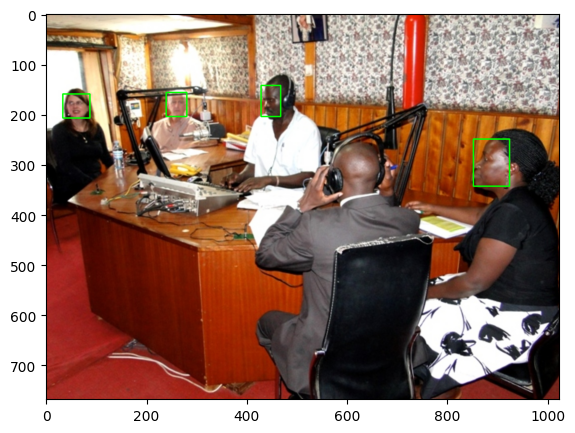

In [8]:
plt.figure(figsize=(20,5))
show_img_lbls(img,lbl)

## Creating Normal Dataset

In [ ]:
def create_normal_dataset(size_of_dataset):

    normal_dataset = []

    IMAGES = '/content/images'
    images = os.listdir(os.path.join(IMAGES,'train'))

    for i in range(size_of_dataset):

        img_path = os.path.join(IMAGES,'train',images[i])

        img = skimage.transform.resize(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY),(640,640),anti_aliasing = True)

        normal_dataset.append(img)

    return np.array(normal_dataset)

In [ ]:
def predict_vanilla(dataset):

  predicted_labels = []
  length_of_dataset = len(dataset)

  for i in range(length_of_dataset):

    predicted_labels.append(face_detector(dataset[i].astype('uint8'))[1])

  return predicted_labels

In [ ]:
normal_dataset = create_normal_dataset(50)

In [ ]:
image_labels = predict_vanilla(normal_dataset)

## Creating Noisy Dataset

In [ ]:
def create_noisy_dataset(size_of_dataset):

  gaussian_noisy_dataset = []
  sp_noisy_dataset = []

  for i in range(size_of_dataset):

    img = normal_dataset[i]

    gaussian_noise_img = skimage.util.random_noise(img,'gaussian', mean = 0, var = 0.4)*255
    gaussian_noisy_dataset.append(gaussian_noise_img)

    sp_noise_img = skimage.util.random_noise(img,'s&p', amount = 0.5)*255
    sp_noisy_dataset.append(sp_noise_img)

  return np.array(gaussian_noisy_dataset) ,np.array(sp_noisy_dataset)

In [ ]:
gaussian_noisy_dataset , sp_noisy_dataset = create_noisy_dataset(50)

## Creating Blurry Dataset

In [ ]:
def create_blurry_dataset(size_of_dataset,gaussian_kernel_size,box_kernel_size):

  gaussian_blurred_dataset = []
  box_blurred_dataset = []

  for i in range(size_of_dataset):

    IMAGES = '/content/images'
    LABELS = '/content/labels'
    images = os.listdir(os.path.join(IMAGES,'train'))
    labels = os.listdir(os.path.join(LABELS,'train'))
    img = os.path.join(IMAGES,'train',images[i])
    lbl = os.path.join(LABELS,'train',images[i][:-3]+'txt')

    img = np.array(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY))

    gaussian_blurred_img = add_gaussian_blur(img,gaussian_kernel_size)[0]
    gaussian_blurred_img = gaussian_blurred_img - np.min(gaussian_blurred_img)
    gaussian_blurred_img = gaussian_blurred_img*255/np.max(gaussian_blurred_img)

    gaussian_blurred_dataset.append(gaussian_blurred_img)

    box_blurred_img = add_box_blur(img,box_kernel_size)[0]
    box_blurred_img -= np.min(box_blurred_img)
    box_blurred_img = box_blurred_img*255/np.max(box_blurred_img)

    box_blurred_dataset.append(box_blurred_img)

  return gaussian_blurred_dataset , box_blurred_dataset

In [ ]:
box_kernel_size = 15
gaussian_kernel_size = 15

In [ ]:
gaussian_blurred_dataset , box_blurred_dataset = create_blurry_dataset(50,gaussian_kernel_size,box_kernel_size)

## Creating Blurred + Noisy (White) Dataset

In [ ]:
def create_blurry_noisy_dataset(size_of_dataset,gaussian_kernel_size,box_kernel_size):

  gaussian_blurred_noisy_dataset = []
  box_blurred_noisy_dataset = []

  IMAGES = '/content/images'
  LABELS = '/content/labels'
  images = os.listdir(os.path.join(IMAGES,'train'))
  labels = os.listdir(os.path.join(LABELS,'train'))

  for i in range(size_of_dataset):


    img = os.path.join(IMAGES,'train',images[i])
    lbl = os.path.join(LABELS,'train',images[i][:-3]+'txt')

    img = np.array(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY))


    gaussian_blurred_img = add_gaussian_blur(img,gaussian_kernel_size)[0]
    gaussian_blurred_noisy_img = skimage.util.random_noise(gaussian_blurred_img,'gaussian', mean = 0, var = 0.5)
    gaussian_blurred_noisy_img = gaussian_blurred_img - np.min(gaussian_blurred_noisy_img)
    gaussian_blurred_noisy_img = gaussian_blurred_noisy_img*255/np.max(gaussian_blurred_noisy_img)

    gaussian_blurred_noisy_dataset.append(gaussian_blurred_noisy_img)

    box_blurred_img = add_box_blur(img,box_kernel_size)[0]
    box_blurred_noisy_img = skimage.util.random_noise(box_blurred_img,'gaussian', mean = 0, var = 0.5)
    box_blurred_noisy_img -= np.min(box_blurred_img)
    box_blurred_noisy_img = box_blurred_noisy_img*255/np.max(box_blurred_noisy_img)

    box_blurred_noisy_dataset.append(box_blurred_noisy_img)

  return gaussian_blurred_noisy_dataset , box_blurred_noisy_dataset

In [ ]:
box_kernel_size = 27
gaussian_kernel_size = 27

In [ ]:
gaussian_blurred_noisy_dataset , box_blurred_noisy_dataset = create_blurry_noisy_dataset(50,gaussian_kernel_size,box_kernel_size)

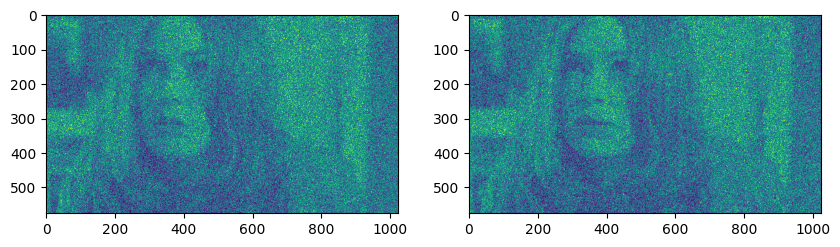

In [ ]:

i = normal_dataset[0]
#plt.imshow(i,cmap = 'gray')
i_scaled=i/255
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(skimage.util.random_noise(i,'gaussian', mean=0,var = 0.3))

plt.subplot(1,2,2)
plt.imshow(skimage.util.random_noise(i_scaled,'gaussian', mean = 0, var = 0.3))

## Creating downsampled Noisy dataset

In [ ]:
def downsampled_noisy_dataset(size_of_dataset):

  upsampled_gaussian_downsampled_noisy_dataset = []
  upsampled_sp_downsampled_noisy_dataset = []

  IMAGES = '/content/images'
  LABELS = '/content/labels'
  images = os.listdir(os.path.join(IMAGES,'train'))
  labels = os.listdir(os.path.join(LABELS,'train'))

  # image_labels = []

  for i in range(size_of_dataset):


    img = os.path.join(IMAGES,'train',images[i])
    lbl = os.path.join(LABELS,'train',images[i][:-3]+'txt')

    img = np.array(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY))

    # img_labels = []

    # height, width = img.shape[:2]
    # with open(lbl, 'r') as f:
    #     lines = f.read()
    # lines = [x for x in lines.split('\n') if len(x)>0]
    # objs = []
    # for i in lines:
    #     i = i.split(' ')
    #     objs.append([int(i[0]), float(i[1]), float(i[2]), float(i[3]), float(i[4])])
    # for i,obj in enumerate(objs):
    #     x_min = int(obj[1]*width - obj[3]*width/2)
    #     x_max = int(obj[1]*width + obj[3]*width/2)

    #     y_min = int(obj[2]*height - obj[4]*height/2)
    #     y_max = int(obj[2]*height + obj[4]*height/2)
    #     img_labels.append([x_min,y_min,x_max, y_max])

    # image_labels.append(img_labels)

    downsampled_image1 = downsampling(img, 2)

    gaussian_downsampled_noise_img = skimage.util.random_noise(downsampled_image1,'gaussian', mean = 0, var = 0.1)
    gaussian_downsampled_noise_img -= np.min(gaussian_downsampled_noise_img)
    gaussian_downsampled_noise_img = gaussian_downsampled_noise_img*255/np.max(gaussian_downsampled_noise_img)

    upsampled_gaussian_downsampled_noise_img = upsampling(gaussian_downsampled_noise_img, 2)

    upsampled_gaussian_downsampled_noisy_dataset.append(upsampled_gaussian_downsampled_noise_img)

    downsampled_image2 = downsampling(img, 3)

    sp_downsampled_noise_img = skimage.util.random_noise(downsampled_image2,'s&p', amount = 0.2)
    sp_downsampled_noise_img -= np.min(sp_downsampled_noise_img)
    sp_downsampled_noise_img = sp_downsampled_noise_img*255/np.max(sp_downsampled_noise_img)

    upsampled_sp_downsampled_noise_img = upsampling(sp_downsampled_noise_img, 3)

    upsampled_sp_downsampled_noisy_dataset.append(upsampled_sp_downsampled_noise_img)

  return upsampled_gaussian_downsampled_noisy_dataset , upsampled_sp_downsampled_noisy_dataset

In [ ]:
upsampled_gaussian_downsampled_noisy_dataset , upsampled_sp_downsampled_noisy_dataset = downsampled_noisy_dataset(50)

## Creating downsampled Blurry Dataset

In [ ]:
def downsampled_blurry_dataset(size_of_dataset):

  upsampled_gaussian_blurred_downsampled_dataset = []
  upsampled_box_blurred_downsampled_dataset = []
  # image_labels = []

  IMAGES = '/content/images'
  LABELS = '/content/labels'
  images = os.listdir(os.path.join(IMAGES,'train'))
  labels = os.listdir(os.path.join(LABELS,'train'))

  for i in range(size_of_dataset):


    img = os.path.join(IMAGES,'train',images[i])
    lbl = os.path.join(LABELS,'train',images[i][:-3]+'txt')

    img = np.array(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY))

    # img_labels = []

    # height, width = img.shape[:2]
    # with open(lbl, 'r') as f:
    #     lines = f.read()
    # lines = [x for x in lines.split('\n') if len(x)>0]
    # objs = []
    # for i in lines:
    #     i = i.split(' ')
    #     objs.append([int(i[0]), float(i[1]), float(i[2]), float(i[3]), float(i[4])])
    # for i,obj in enumerate(objs):
    #     x_min = int(obj[1]*width - obj[3]*width/2)
    #     x_max = int(obj[1]*width + obj[3]*width/2)

    #     y_min = int(obj[2]*height - obj[4]*height/2)
    #     y_max = int(obj[2]*height + obj[4]*height/2)
    #     img_labels.append([x_min,y_min,x_max, y_max])

    # image_labels.append(img_labels)

    downsampled_image1 = downsampling(img, 2)

    gaussian_blurred_downsampled_img = add_gaussian_blur(downsampled_image1,13)[0]
    gaussian_blurred_downsampled_img = gaussian_blurred_downsampled_img - np.min(gaussian_blurred_downsampled_img)
    gaussian_blurred_downsampled_img = gaussian_blurred_downsampled_img*255/np.max(gaussian_blurred_downsampled_img)

    upsampled_gaussian_blurred_downsampled_img = upsampling(gaussian_blurred_downsampled_img, 2)

    upsampled_gaussian_blurred_downsampled_dataset.append(upsampled_gaussian_blurred_downsampled_img)

    downsampled_image2 = downsampling(img, 3)

    box_blurred_downsampled_img = add_box_blur(downsampled_image2,15)[0]
    box_blurred_downsampled_img -= np.min(box_blurred_downsampled_img)
    box_blurred_downsampled_img = box_blurred_downsampled_img*255/np.max(box_blurred_downsampled_img)

    upsampled_box_blurred_downsampled_img = upsampling(box_blurred_downsampled_img, 3)

    upsampled_box_blurred_downsampled_dataset.append(upsampled_box_blurred_downsampled_img)


  return upsampled_gaussian_blurred_downsampled_dataset , upsampled_box_blurred_downsampled_dataset

In [ ]:
upsampled_gaussian_blurred_downsampled_dataset , upsampled_box_blurred_downsampled_dataset = downsampled_blurry_dataset(50)

## Prediction Algorithms

In [ ]:
def predict_vanilla(dataset):

  predicted_labels = []
  length_of_dataset = len(dataset)

  for i in range(length_of_dataset):

    predicted_labels.append(face_detector(dataset[i].astype('uint8'))[1])

  return predicted_labels

In [ ]:
def predict_nlm(dataset):

  predicted_labels = []
  length_of_dataset = len(dataset)
  for i in range(length_of_dataset):


    patch_kw = dict(patch_size=5,      # 5x5 patches
                  patch_distance=6,  # 13x13 search area
                  channel_axis=-1)
    sigma_est = np.mean(estimate_sigma(dataset[i]))
    denoise2_fast = denoise_nl_means(dataset[i], h=0.6 * sigma_est, sigma=sigma_est, fast_mode=True)

    predicted_labels.append(face_detector(denoise2_fast.astype('uint8'))[1])

  return predicted_labels

In [ ]:
def predict_pca(dataset,number_of_components):

    pca_dataset = []

    for i in dataset:
        pca_dataset.append(i.ravel())

    pca = decomposition.PCA(n_components = number_of_components)
    pca_dataset = pca.inverse_transform(pca.fit_transform(pca_dataset))

    denoised_dataset = []

    for i in pca_dataset:
        denoised_dataset.append(i.reshape(640,640))

    predicted_labels = predict_vanilla(denoised_dataset)

    return predicted_labels

In [ ]:
def predict_wiener(dataset,blur_kernel,sigma):


  predicted_labels = []
  length_of_dataset = len(dataset)

  for i in range(length_of_dataset):

    predicted_labels.append(face_detector(restore_image_wiener(dataset[i],blur_kernel,sigma).astype('uint8'))[1])

  return predicted_labels

In [ ]:
def predict_pca_contrasted(dataset,number_of_components,CE):

    CE_types = {'GHE':0,'BBHE':1,'RMSHE':2}

    CE_type = CE_types[CE]

    predicted_labels = []
    length_of_dataset = len(dataset)

    pca_dataset = []

    for i in dataset:
        pca_dataset.append(i.ravel())

    pca = decomposition.PCA(n_components = number_of_components)
    pca_dataset = pca.inverse_transform(pca.fit_transform(pca_dataset))

    color_PCA_restored_dataset = []

    for i in pca_dataset:
        color_PCA_restored_image = cv2.cvtColor(i.reshape(640,640).astype('uint8'), cv2.COLOR_GRAY2BGR)
        contrast_enhanced_image = contrast_enhancement(color_PCA_restored_image)[CE_type]
        color_PCA_restored_dataset.append(contrast_enhanced_image)

    predicted_labels = predict_vanilla(color_PCA_restored_dataset)

#   for i in range(length_of_dataset):

#     PCA_restored_image = restore_image_PCA(dataset[i] , number_of_components)
#     color_PCA_restored_image = cv2.cvtColor(PCA_restored_image.astype('uint8') , cv2.COLOR_GRAY2BGR)
#     contrast_enhanced_image = contrast_enhancement(color_PCA_restored_image)[CE_type]
#     predicted_labels.append(face_detector(contrast_enhanced_image.astype('uint8'))[1])

    return predicted_labels

In [ ]:
def predict_nlm_contrasted(dataset,CE):

  CE_types = {'GHE':0,'BBHE':1,'RMSHE':2}

  CE_type = CE_types[CE]

  predicted_labels = []
  length_of_dataset = len(dataset)
  for i in range(length_of_dataset):


    patch_kw = dict(patch_size=5,      # 5x5 patches
                  patch_distance=6,  # 13x13 search area
                  channel_axis=-1)
    sigma_est = np.mean(estimate_sigma(dataset[i]))
    denoise2_fast = denoise_nl_means(dataset[i], h=0.6 * sigma_est, sigma=sigma_est, fast_mode=True)
    color_denoise2_fast = cv2.cvtColor(denoise2_fast.astype('uint8'), cv2.COLOR_GRAY2BGR)
    contrast_enhanced_image = contrast_enhancement(color_denoise2_fast)[CE_type]
    predicted_labels.append(face_detector(contrast_enhanced_image.astype('uint8'))[1])

  return predicted_labels

## Performance Measures



*   Intersection Over Union (IOU)
*   Average Precision (AP)
*   Average Recall



In [ ]:
def calculate_iou(predicted_labels,image_labels):

  iou_array = []

  for i in range(len(predicted_labels)):

    if len(predicted_labels[i])>0:
      ground_truth_windows = image_labels[i]

      for j in range(len(predicted_labels[i])):

        window = predicted_labels[i][j]

        for ground_truth_window in ground_truth_windows:
          if np.allclose(window,ground_truth_window, atol = 100):
            iou_value = get_iou(window,ground_truth_window)
            iou_array.append(iou_value)
            break
    else:
      iou_array.append(0)

  return iou_array

In [ ]:
def average_precision(predicted_labels,image_labels):

  true_positive = 0
  false_positive = 0

  for i in range(len(predicted_labels)):

    ground_truth_windows = image_labels[i]

    if len(predicted_labels[i])>0:

      for j in range(len(predicted_labels[i])):

        window = predicted_labels[i][j]

        true_positive_initial = true_positive

        for ground_truth_window in ground_truth_windows:
          if np.allclose(window,ground_truth_window, atol = 100):
            true_positive+=1
            break

        if true_positive == true_positive_initial:
          false_positive+=1

  if true_positive+false_positive!=0:
    avg_precision = true_positive/(true_positive+false_positive)
  else:
    avg_precision = 0

  return avg_precision

In [ ]:
def average_recall(predicted_labels,image_labels):

  true_positive = 0
  false_positive = 0
  false_negative = 0

  for i in range(len(predicted_labels)):

    ground_truth_windows = image_labels[i]

    ground_truth_seen_windows = []


    if len(predicted_labels[i])>0:


      for j in range(len(predicted_labels[i])):

        predicted_window = predicted_labels[i][j]

        true_positive_initial = true_positive

        for ground_truth_window in ground_truth_windows:

          if ground_truth_window in ground_truth_seen_windows:
            continue
          else:
            if np.allclose(predicted_window,ground_truth_window, atol = 100):
              true_positive+=1

              ground_truth_seen_windows.append(ground_truth_window)

              break

        if true_positive == true_positive_initial:
          false_positive+=1

    false_negative+= abs(len(ground_truth_windows)-len(ground_truth_seen_windows))

  if true_positive+false_negative!=0:
    avg_recall = true_positive/(true_positive+false_negative)
  else:
    avg_recall = 0


  return avg_recall

# **Results**

### Gaussian Noisy Dataset

In [ ]:
predicted_labels_vanilla = predict_vanilla(gaussian_noisy_dataset)

In [ ]:
predicted_labels_nlm = predict_nlm(gaussian_noisy_dataset)

In [ ]:
predicted_labels_pca = predict_pca(gaussian_noisy_dataset,40)

In [ ]:
predicted_labels_pca_BBHE = predict_pca_contrasted(gaussian_noisy_dataset,50,'BBHE')

In [ ]:
predicted_labels_nlm_BBHE = predict_nlm_contrasted(gaussian_noisy_dataset,'BBHE')

In [ ]:
predicted_labels_pca_RMSHE = predict_pca_contrasted(gaussian_noisy_dataset,50,'RMSHE')

In [ ]:
predicted_labels_nlm_RMSHE = predict_nlm_contrasted(gaussian_noisy_dataset,'RMSHE')

In [ ]:
iou_nlm = np.array(calculate_iou(predicted_labels_nlm,image_labels))
iou_vanilla = np.array(calculate_iou(predicted_labels_vanilla,image_labels))
iou_pca = np.array(calculate_iou(predicted_labels_pca,image_labels))
iou_pca_BBHE = np.array(calculate_iou(predicted_labels_pca_BBHE,image_labels))
iou_nlm_BBHE = np.array(calculate_iou(predicted_labels_nlm_BBHE,image_labels))
iou_pca_RMSHE = np.array(calculate_iou(predicted_labels_pca_RMSHE,image_labels))
iou_nlm_RMSHE = np.array(calculate_iou(predicted_labels_nlm_RMSHE,image_labels))

In [ ]:
avg_precision_vanilla = average_precision(predicted_labels_vanilla,image_labels)
avg_precision_nlm = average_precision(predicted_labels_nlm,image_labels)
avg_precision_pca = average_precision(predicted_labels_pca,image_labels)
avg_precision_nlm_bbhe = average_precision(predicted_labels_nlm_BBHE,image_labels)
avg_precision_pca_bbhe = average_precision(predicted_labels_pca_BBHE,image_labels)
avg_precision_nlm_rmshe = average_precision(predicted_labels_nlm_BBHE,image_labels)
avg_precision_pca_rmshe = average_precision(predicted_labels_pca_RMSHE,image_labels)

In [ ]:
avg_recall_vanilla = average_recall(predicted_labels_vanilla,image_labels)
avg_recall_nlm = average_recall(predicted_labels_nlm,image_labels)
avg_recall_pca = average_recall(predicted_labels_pca,image_labels)
avg_recall_nlm_bbhe = average_recall(predicted_labels_nlm_BBHE,image_labels)
avg_recall_pca_bbhe = average_recall(predicted_labels_pca_BBHE,image_labels)
avg_recall_nlm_rmshe = average_recall(predicted_labels_nlm_BBHE,image_labels)
avg_recall_pca_rmshe = average_recall(predicted_labels_pca_RMSHE,image_labels)

In [ ]:
print('GAUSSIAN NOISY DATASET')
print('\n')

print('Number of Images Considered : ' + str(len(gaussian_noisy_dataset)))
print('\n')

print('Average IoU over all images without denoising is '+str(np.mean(iou_vanilla)))
print('Average IoU over all images using NLM Denoising is '+str(np.mean(iou_nlm)))
print('Average IoU over all images using NLM and BBHE is '+str(np.mean(iou_nlm_BBHE)))
print('Average IoU over all images using NLM and RMSHE is '+str(np.mean(iou_nlm_RMSHE)))
print('Average IoU over all images using PCA Denoising is '+str(np.mean(iou_pca)))
print('Average IoU over all images using PCA and BBHE is '+str(np.mean(iou_pca_BBHE)))
print('Average IoU over all images using PCA and RMSHE is '+str(np.mean(iou_pca_RMSHE)))
print('\n')

print('Average IoU over detected images without denoising is '+str(np.mean(iou_vanilla[iou_vanilla!=0])))
print('Average IoU over detected images using NLM Denoising is '+str(np.mean(iou_nlm[iou_nlm!=0])))
print('Average IoU over detected images using NLM and BBHE is '+str(np.mean(iou_nlm_BBHE[iou_nlm_BBHE!=0])))
print('Average IoU over detected images using NLM and RMSHE is '+str(np.mean(iou_nlm_RMSHE[iou_nlm_RMSHE!=0])))
print('Average IoU over detected images using PCA Denoising is '+str(np.mean(iou_pca[iou_pca!=0])))
print('Average IoU over detected images using PCA and BBHE is '+str(np.mean(iou_pca_BBHE[iou_pca_BBHE!=0])))
print('Average IoU over detected images using PCA and RMSHE is '+str(np.mean(iou_pca_RMSHE[iou_pca_RMSHE!=0])))
print('\n')

print(' Average Precision without denoising is ' + str(avg_precision_vanilla))
print(' Average Precision using NLM Denoising is ' + str(avg_precision_nlm))
print(' Average Precision using NLM and BBHE is ' + str(avg_precision_nlm_bbhe))
print(' Average Precision using NLM and RMSHE is ' + str(avg_precision_nlm_rmshe))
print(' Average Precision using PCA is ' + str(avg_precision_pca))
print(' Average Precision using PCA and BBHE is ' + str(avg_precision_pca_bbhe))
print(' Average Precision using PCA and RMSHE is ' + str(avg_precision_pca_rmshe))
print('\n')

print(' Average Recall without denoising is ' + str(avg_recall_vanilla))
print(' Average Recall using NLM Denoising is ' + str(avg_recall_nlm))
print(' Average Recall using NLM and BBHE is ' + str(avg_recall_nlm_bbhe))
print(' Average Recall using NLM and RMSHE is ' + str(avg_recall_nlm_rmshe))
print(' Average Recall using PCA is ' + str(avg_recall_pca))
print(' Average Recall using PCA and BBHE is ' + str(avg_recall_pca_bbhe))
print(' Average Recall using PCA and RMSHE is ' + str(avg_recall_pca_rmshe))

GAUSSIAN NOISY DATASET


Number of Images Considered : 50


Average IoU over all images without denoising is 0.0
Average IoU over all images using NLM Denoising is 0.0
Average IoU over all images using NLM and BBHE is 0.0
Average IoU over all images using NLM and RMSHE is 0.0
Average IoU over all images using PCA Denoising is 0.0
Average IoU over all images using PCA and BBHE is 0.0
Average IoU over all images using PCA and RMSHE is 0.0


Average IoU over detected images without denoising is nan
Average IoU over detected images using NLM Denoising is nan
Average IoU over detected images using NLM and BBHE is nan
Average IoU over detected images using NLM and RMSHE is nan
Average IoU over detected images using PCA Denoising is nan
Average IoU over detected images using PCA and BBHE is nan
Average IoU over detected images using PCA and RMSHE is nan


 Average Precision without denoising is 0
 Average Precision using NLM Denoising is 0.0
 Average Precision using NLM and BBHE is 0.0
 Avera

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Salt and Pepper Noisy Dataset

In [ ]:
predicted_labels_vanilla = predict_vanilla(sp_noisy_dataset)

In [ ]:
predicted_labels_nlm = predict_nlm(sp_noisy_dataset)

In [ ]:
predicted_labels_pca = predict_pca(sp_noisy_dataset,50)

In [ ]:
predicted_labels_pca_BBHE = predict_pca_contrasted(sp_noisy_dataset,50,'BBHE')

In [ ]:
predicted_labels_nlm_BBHE = predict_nlm_contrasted(sp_noisy_dataset,'BBHE')

In [ ]:
predicted_labels_pca_RMSHE = predict_pca_contrasted(sp_noisy_dataset,50,'RMSHE')

In [ ]:
predicted_labels_nlm_RMSHE = predict_nlm_contrasted(sp_noisy_dataset,'RMSHE')

In [ ]:
iou_nlm = np.array(calculate_iou(predicted_labels_nlm,image_labels))
iou_vanilla = np.array(calculate_iou(predicted_labels_vanilla,image_labels))
iou_pca = np.array(calculate_iou(predicted_labels_pca,image_labels))
iou_pca_BBHE = np.array(calculate_iou(predicted_labels_pca_BBHE,image_labels))
iou_nlm_BBHE = np.array(calculate_iou(predicted_labels_nlm_BBHE,image_labels))
iou_pca_RMSHE = np.array(calculate_iou(predicted_labels_pca_RMSHE,image_labels))
iou_nlm_RMSHE = np.array(calculate_iou(predicted_labels_nlm_RMSHE,image_labels))

In [ ]:
avg_precision_vanilla = average_precision(predicted_labels_vanilla,image_labels)
avg_precision_nlm = average_precision(predicted_labels_nlm,image_labels)
avg_precision_pca = average_precision(predicted_labels_pca,image_labels)
avg_precision_nlm_bbhe = average_precision(predicted_labels_nlm_BBHE,image_labels)
avg_precision_pca_bbhe = average_precision(predicted_labels_pca_BBHE,image_labels)
avg_precision_nlm_rmshe = average_precision(predicted_labels_nlm_BBHE,image_labels)
avg_precision_pca_rmshe = average_precision(predicted_labels_pca_RMSHE,image_labels)

In [ ]:
avg_recall_vanilla = average_recall(predicted_labels_vanilla,image_labels)
avg_recall_nlm = average_recall(predicted_labels_nlm,image_labels)
avg_recall_pca = average_recall(predicted_labels_pca,image_labels)
avg_recall_nlm_bbhe = average_recall(predicted_labels_nlm_BBHE,image_labels)
avg_recall_pca_bbhe = average_recall(predicted_labels_pca_BBHE,image_labels)
avg_recall_nlm_rmshe = average_recall(predicted_labels_nlm_BBHE,image_labels)
avg_recall_pca_rmshe = average_recall(predicted_labels_pca_RMSHE,image_labels)

In [ ]:
print('SALT AND PEPPER NOISY DATASET')
print('\n')

print('Number of Images Considered : ' + str(len(sp_noisy_dataset)))
print('\n')

print('Average IoU over all images without denoising is '+str(np.mean(iou_vanilla)))
print('Average IoU over all images using NLM Denoising is '+str(np.mean(iou_nlm)))
print('Average IoU over all images using NLM and BBHE is '+str(np.mean(iou_nlm_BBHE)))
print('Average IoU over all images using NLM and RMSHE is '+str(np.mean(iou_nlm_RMSHE)))
print('Average IoU over all images using PCA Denoising is '+str(np.mean(iou_pca)))
print('Average IoU over all images using PCA and BBHE is '+str(np.mean(iou_pca_BBHE)))
print('Average IoU over all images using PCA and RMSHE is '+str(np.mean(iou_pca_RMSHE)))
print('\n')

print('Average IoU over detected images without denoising is '+str(np.mean(iou_vanilla[iou_vanilla!=0])))
print('Average IoU over detected images using NLM Denoising is '+str(np.mean(iou_nlm[iou_nlm!=0])))
print('Average IoU over detected images using NLM and BBHE is '+str(np.mean(iou_nlm_BBHE[iou_nlm_BBHE!=0])))
print('Average IoU over detected images using NLM and RMSHE is '+str(np.mean(iou_nlm_RMSHE[iou_nlm_RMSHE!=0])))
print('Average IoU over detected images using PCA Denoising is '+str(np.mean(iou_pca[iou_pca!=0])))
print('Average IoU over detected images using PCA and BBHE is '+str(np.mean(iou_pca_BBHE[iou_pca_BBHE!=0])))
print('Average IoU over detected images using PCA and RMSHE is '+str(np.mean(iou_pca_RMSHE[iou_pca_RMSHE!=0])))
print('\n')

print(' Average Precision without denoising is ' + str(avg_precision_vanilla))
print(' Average Precision using NLM Denoising is ' + str(avg_precision_nlm))
print(' Average Precision using NLM and BBHE is ' + str(avg_precision_nlm_bbhe))
print(' Average Precision using NLM and RMSHE is ' + str(avg_precision_nlm_rmshe))
print(' Average Precision using PCA is ' + str(avg_precision_pca))
print(' Average Precision using PCA and BBHE is ' + str(avg_precision_pca_bbhe))
print(' Average Precision using PCA and RMSHE is ' + str(avg_precision_pca_rmshe))
print('\n')

print(' Average Recall without denoising is ' + str(avg_recall_vanilla))
print(' Average Recall using NLM Denoising is ' + str(avg_recall_nlm))
print(' Average Recall using NLM and BBHE is ' + str(avg_recall_nlm_bbhe))
print(' Average Recall using NLM and RMSHE is ' + str(avg_recall_nlm_rmshe))
print(' Average Recall using PCA is ' + str(avg_recall_pca))
print(' Average Recall using PCA and BBHE is ' + str(avg_recall_pca_bbhe))
print(' Average Recall using PCA and RMSHE is ' + str(avg_recall_pca_rmshe))

SALT AND PEPPER NOISY DATASET


Number of Images Considered : 50


Average IoU over all images without denoising is 0.0
Average IoU over all images using NLM Denoising is 0.28248518133362416
Average IoU over all images using NLM and BBHE is 0.26934849847099385
Average IoU over all images using NLM and RMSHE is 0.29345276170954837
Average IoU over all images using PCA Denoising is 0.01326543973230523
Average IoU over all images using PCA and BBHE is 0.0
Average IoU over all images using PCA and RMSHE is 0.0


Average IoU over detected images without denoising is nan
Average IoU over detected images using NLM Denoising is 0.8317619228156712
Average IoU over detected images using NLM and BBHE is 0.8850022092618371
Average IoU over detected images using NLM and RMSHE is 0.8253358923081049
Average IoU over detected images using PCA Denoising is 0.6632719866152615
Average IoU over detected images using PCA and BBHE is nan
Average IoU over detected images using PCA and RMSHE is nan


 Average

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Gaussian Blurred Dataset

In [ ]:
# plt.imshow(restore_image_wiener(add_gaussian_blur(sample_image_1,15)[0],add_gaussian_blur(sample_image_1,15)[1],10),cmap='gray')

In [ ]:
P = gaussian_kernel_size
Q = P
sigma = P/2
blur_kernel = [[ math.exp(-((i-P/2)**2+(j-Q/2)**2)/(2*sigma**2)) for i in range(P)]for j in range(Q)]
blur_kernel /= np.sum(blur_kernel)

In [ ]:
predicted_labels_vanilla = predict_vanilla(gaussian_blurred_dataset)

In [ ]:
predicted_labels_wiener = predict_wiener(gaussian_blurred_dataset,blur_kernel,20)

<ipython-input-17-1adb69309581>:26: RuntimeWarning: divide by zero encountered in divide
  Sf = k/((xv**2+yv**2)**0.5)


In [ ]:
iou_vanilla = np.array(calculate_iou(predicted_labels_vanilla,image_labels))
iou_wiener = np.array(calculate_iou(predicted_labels_wiener,image_labels))

In [ ]:
avg_precision_vanilla = average_precision(predicted_labels_vanilla,image_labels)
avg_precision_wiener = average_precision(predicted_labels_wiener,image_labels)

In [ ]:
avg_recall_vanilla = average_recall(predicted_labels_vanilla,image_labels)
avg_recall_wiener = average_recall(predicted_labels_wiener,image_labels)

In [ ]:
print('GAUSSIAN BLURRED DATASET')
print('\n')

print('Number of Images Considered : ' + str(len(gaussian_blurred_dataset)))
print('\n')

print('Average IoU over all images without deblurring is '+str(np.mean(iou_vanilla)))
print('Average IoU over all images using Wiener Filtering is '+str(np.mean(iou_wiener)))

print('\n')
print('Average IoU over detected images without deblurring is '+str(np.mean(iou_vanilla[iou_vanilla!=0])))
print('Average IoU over detected images using Wiener Filtering is '+str(np.mean(iou_wiener[iou_wiener!=0])))
print('\n')

print('Average Precision without deblurring is '+str(round(avg_precision_vanilla,4)))
print('Average Precision using Wiener Filtering is '+str(round(avg_precision_wiener,4)))
print('\n')

print('Average Recall without deblurring is '+str(round(avg_recall_vanilla,4)))
print('Average Recall using Wiener Filtering is '+str(round(avg_recall_wiener,4)))

GAUSSIAN BLURRED DATASET


Number of Images Considered : 50


Average IoU over all images without deblurring is 0.5063339538941106
Average IoU over all images using Wiener Filtering is 0.4942934051953911


Average IoU over detected images without deblurring is 0.8720195872620793
Average IoU over detected images using Wiener Filtering is 0.7474680761491281


Average Precision without deblurring is 0.9231
Average Precision using Wiener Filtering is 0.8723


Average Recall without deblurring is 0.72
Average Recall using Wiener Filtering is 0.82


### Box Blurred Dataset

In [ ]:
blur_kernel_size = box_kernel_size
blur_kernel = np.ones((blur_kernel_size,blur_kernel_size))
blur_kernel /= np.sum(blur_kernel)

In [ ]:
predicted_labels_vanilla = predict_vanilla(box_blurred_dataset)

In [ ]:
predicted_labels_wiener = predict_wiener(box_blurred_dataset,blur_kernel,10)

<ipython-input-17-1adb69309581>:26: RuntimeWarning: divide by zero encountered in divide
  Sf = k/((xv**2+yv**2)**0.5)


In [ ]:
iou_vanilla = np.array(calculate_iou(predicted_labels_vanilla,image_labels))
iou_wiener = np.array(calculate_iou(predicted_labels_wiener,image_labels))

In [ ]:
avg_precision_vanilla = average_precision(predicted_labels_vanilla,image_labels)
avg_precision_wiener = average_precision(predicted_labels_wiener,image_labels)

In [ ]:
avg_recall_vanilla = average_precision(predicted_labels_vanilla,image_labels)
avg_recall_wiener = average_precision(predicted_labels_wiener,image_labels)

In [ ]:
print('BOX BLURRED DATASET')
print('\n')

print('Number of Images Considered : ' + str(len(box_blurred_dataset)))
print('\n')

print('Average IoU over all images without deblurring is '+str(np.mean(iou_vanilla)))
print('Average IoU over all images using Wiener Filtering is '+str(np.mean(iou_wiener)))
print('\n')

print('Average IoU over detected images without deblurring is '+str(np.mean(iou_vanilla[iou_vanilla!=0])))
print('Average IoU over detected images using Wiener Filtering is '+str(np.mean(iou_wiener[iou_wiener!=0])))
print('\n')

print('Average Precision without deblurring is '+str(round(avg_precision_vanilla,4)))
print('Average Precision using Wiener Filtering is '+str(round(avg_precision_wiener,4)))
print('\n')

print('Average Recall without deblurring is '+str(round(avg_recall_vanilla,4)))
print('Average Recall using Wiener Filtering is '+str(round(avg_recall_wiener,4)))

BOX BLURRED DATASET


Number of Images Considered : 50


Average IoU over all images without deblurring is 0.47490157207872724
Average IoU over all images using Wiener Filtering is 0.4894598004707779


Average IoU over detected images without deblurring is 0.8778483605091625
Average IoU over detected images using Wiener Filtering is 0.7464261957179363


Average Precision without deblurring is 0.9167
Average Precision using Wiener Filtering is 0.8696


Average Recall without deblurring is 0.9167
Average Recall using Wiener Filtering is 0.8696


### Gaussian Blurred + White Noisy Dataset

In [ ]:
P = gaussian_kernel_size
Q = P
sigma = P/2
blur_kernel = [[ math.exp(-((i-P/2)**2+(j-Q/2)**2)/(2*sigma**2)) for i in range(P)]for j in range(Q)]
blur_kernel /= np.sum(blur_kernel)

In [ ]:
predicted_labels_vanilla = predict_vanilla(gaussian_blurred_noisy_dataset)

In [ ]:
predicted_labels_wiener = predict_wiener(gaussian_blurred_noisy_dataset,blur_kernel,11.29)

<ipython-input-17-1adb69309581>:26: RuntimeWarning: divide by zero encountered in divide
  Sf = k/((xv**2+yv**2)**0.5)


In [ ]:
iou_vanilla = np.array(calculate_iou(predicted_labels_vanilla,image_labels))
iou_wiener = np.array(calculate_iou(predicted_labels_wiener,image_labels))

In [ ]:
avg_precision_vanilla = average_precision(predicted_labels_vanilla,image_labels)
avg_precision_wiener = average_precision(predicted_labels_wiener,image_labels)

In [ ]:
avg_recall_vanilla = average_recall(predicted_labels_vanilla,image_labels)
avg_recall_wiener = average_recall(predicted_labels_wiener,image_labels)

In [ ]:
print('GAUSSIAN BLURRED AND WHITE NOISY DATASET')
print('\n')

print('Number of Images Considered : ' + str(len(gaussian_blurred_noisy_dataset)))
print('\n')

print('Average IoU over all images without deblurring is '+str(np.mean(iou_vanilla)))
print('Average IoU over all images using Wiener Filtering is '+str(np.mean(iou_wiener)))

print('\n')
print('Average IoU over detected images without deblurring is '+str(np.mean(iou_vanilla[iou_vanilla!=0])))
print('Average IoU over detected images using Wiener Filtering is '+str(np.mean(iou_wiener[iou_wiener!=0])))
print('\n')

print('Average Precision without deblurring is '+str(round(avg_precision_vanilla,4)))
print('Average Precision using Wiener Filtering is '+str(round(avg_precision_wiener,4)))
print('\n')

print('Average Recall without deblurring is '+str(round(avg_recall_vanilla,4)))
print('Average Recall using Wiener Filtering is '+str(round(avg_recall_wiener,4)))

GAUSSIAN BLURRED AND WHITE NOISY DATASET


Number of Images Considered : 50


Average IoU over all images without deblurring is 0.3248945233995433
Average IoU over all images using Wiener Filtering is 0.3635903791937104


Average IoU over detected images without deblurring is 0.850914227951185
Average IoU over detected images using Wiener Filtering is 0.617001855601448


Average Precision without deblurring is 0.875
Average Precision using Wiener Filtering is 0.7674


Average Recall without deblurring is 0.42
Average Recall using Wiener Filtering is 0.66


### Downsampled Gaussian Noisy Dataset

In [ ]:
predicted_labels_vanilla = predict_vanilla(upsampled_gaussian_downsampled_noisy_dataset)

In [ ]:
predicted_labels_nlm = predict_nlm(upsampled_gaussian_downsampled_noisy_dataset)

In [ ]:
predicted_labels_pca = predict_pca(upsampled_gaussian_downsampled_noisy_dataset,50)

In [ ]:
predicted_labels_pca_BBHE = predict_pca_contrasted(upsampled_gaussian_downsampled_noisy_dataset,50,'BBHE')

In [ ]:
predicted_labels_nlm_BBHE = predict_nlm_contrasted(upsampled_gaussian_downsampled_noisy_dataset,'BBHE')

In [ ]:
predicted_labels_pca_RMSHE = predict_pca_contrasted(upsampled_gaussian_downsampled_noisy_dataset,50,'RMSHE')

In [ ]:
predicted_labels_nlm_RMSHE = predict_nlm_contrasted(upsampled_gaussian_downsampled_noisy_dataset,'RMSHE')

In [ ]:
iou_nlm = np.array(calculate_iou(predicted_labels_nlm,image_labels))
iou_vanilla = np.array(calculate_iou(predicted_labels_vanilla,image_labels))
iou_pca = np.array(calculate_iou(predicted_labels_pca,image_labels))
iou_pca_BBHE = np.array(calculate_iou(predicted_labels_pca_BBHE,image_labels))
iou_nlm_BBHE = np.array(calculate_iou(predicted_labels_nlm_BBHE,image_labels))
iou_pca_RMSHE = np.array(calculate_iou(predicted_labels_pca_RMSHE,image_labels))
iou_nlm_RMSHE = np.array(calculate_iou(predicted_labels_nlm_RMSHE,image_labels))

In [ ]:
print('UPSAMPLED GAUSSIAN DOWNSAMPLED NOISY DATASET')
print('\n')

print('Number of Images Considered : ' + str(len(gaussian_noisy_dataset)))
print('Average IoU over all images without denoising is '+str(np.mean(iou_vanilla)))
print('Average IoU over all images using NLM Denoising is '+str(np.mean(iou_nlm)))
print('Average IoU over all images using PCA Denoising is '+str(np.mean(iou_pca)))
print('Average IoU over all images using NLM and BBHE is '+str(np.mean(iou_nlm_BBHE)))
print('Average IoU over all images using PCA and BBHE is '+str(np.mean(iou_pca_BBHE)))
print('Average IoU over all images using NLM and RMSHE is '+str(np.mean(iou_nlm_RMSHE)))
print('Average IoU over all images using PCA and contrast RMSHE is '+str(np.mean(iou_pca_RMSHE)))
print('\n')

print('Average IoU over detected images without denoising is '+str(np.mean(iou_vanilla[iou_vanilla!=0])))
print('Average IoU over detected images using NLM Denoising is '+str(np.mean(iou_nlm[iou_nlm!=0])))
print('Average IoU over detected images using PCA Denoising is '+str(np.mean(iou_pca[iou_pca!=0])))
print('Average IoU over detected images using NLM and BBHE is '+str(np.mean(iou_nlm_BBHE[iou_nlm_BBHE!=0])))
print('Average IoU over detected images using PCA and BBHE is '+str(np.mean(iou_pca_BBHE[iou_pca_BBHE!=0])))
print('Average IoU over detected images using NLM and RMSHE is '+str(np.mean(iou_nlm_RMSHE[iou_nlm_RMSHE!=0])))
print('Average IoU over detected images using PCA and RMSHE is '+str(np.mean(iou_pca_RMSHE[iou_pca_RMSHE!=0])))

### Downsampled Salt and Pepper Noisy Dataset

In [ ]:
predicted_labels_vanilla = predict_vanilla(upsampled_sp_downsampled_noisy_dataset)
predicted_labels_nlm = predict_nlm(upsampled_sp_downsampled_noisy_dataset)
predicted_labels_pca = predict_pca(upsampled_sp_downsampled_noisy_dataset,50)

In [ ]:
predicted_labels_pca_BBHE = predict_pca_contrasted(upsampled_sp_downsampled_noisy_dataset,50,'BBHE')

In [ ]:
predicted_labels_nlm_BBHE = predict_nlm_contrasted(upsampled_sp_downsampled_noisy_dataset,'BBHE')

In [ ]:
predicted_labels_pca_RMSHE = predict_pca_contrasted(upsampled_sp_downsampled_noisy_dataset,50,'RMSHE')

In [ ]:
predicted_labels_nlm_RMSHE = predict_nlm_contrasted(upsampled_sp_downsampled_noisy_dataset,'RMSHE')

In [ ]:
iou_nlm = np.array(calculate_iou(predicted_labels_nlm,image_labels))
iou_vanilla = np.array(calculate_iou(predicted_labels_vanilla,image_labels))
iou_pca = np.array(calculate_iou(predicted_labels_pca,image_labels))
iou_pca_BBHE = np.array(calculate_iou(predicted_labels_pca_BBHE,image_labels))
iou_nlm_BBHE = np.array(calculate_iou(predicted_labels_nlm_BBHE,image_labels))
iou_pca_RMSHE = np.array(calculate_iou(predicted_labels_pca_RMSHE,image_labels))
iou_nlm_RMSHE = np.array(calculate_iou(predicted_labels_nlm_RMSHE,image_labels))

In [ ]:
print('UPSAMPLED GAUSSIAN DOWNSAMPLED NOISY DATASET')
print('\n')

print('Number of Images Considered : ' + str(len(gaussian_noisy_dataset)))
print('Average IoU over all images without denoising is '+str(np.mean(iou_vanilla)))
print('Average IoU over all images using NLM Denoising is '+str(np.mean(iou_nlm)))
print('Average IoU over all images using PCA Denoising is '+str(np.mean(iou_pca)))
print('Average IoU over all images using NLM and BBHE is '+str(np.mean(iou_nlm_BBHE)))
print('Average IoU over all images using PCA and BBHE is '+str(np.mean(iou_pca_BBHE)))
print('Average IoU over all images using NLM and RMSHE is '+str(np.mean(iou_nlm_RMSHE)))
print('Average IoU over all images using PCA and contrast RMSHE is '+str(np.mean(iou_pca_RMSHE)))
print('\n')

print('Average IoU over detected images without denoising is '+str(np.mean(iou_vanilla[iou_vanilla!=0])))
print('Average IoU over detected images using NLM Denoising is '+str(np.mean(iou_nlm[iou_nlm!=0])))
print('Average IoU over detected images using PCA Denoising is '+str(np.mean(iou_pca[iou_pca!=0])))
print('Average IoU over detected images using NLM and BBHE is '+str(np.mean(iou_nlm_BBHE[iou_nlm_BBHE!=0])))
print('Average IoU over detected images using PCA and BBHE is '+str(np.mean(iou_pca_BBHE[iou_pca_BBHE!=0])))
print('Average IoU over detected images using NLM and RMSHE is '+str(np.mean(iou_nlm_RMSHE[iou_nlm_RMSHE!=0])))
print('Average IoU over detected images using PCA and RMSHE is '+str(np.mean(iou_pca_RMSHE[iou_pca_RMSHE!=0])))

UPSAMPLED GAUSSIAN DOWNSAMPLED NOISY DATASET
Number of Images Considered : 50
Average IoU over all images without denoising is 0.032139672129262
Average IoU over detected images without denoising is 0.2442615081823912
Average IoU over all images using NLM Denoising is 0.032139672129262
Average IoU over detected images using NLM Denoising is 0.2442615081823912
Average IoU over all images using PCA Denoising is 0.021752982554965484
Average IoU over detected images using PCA Denoising is 0.41330666854434417
